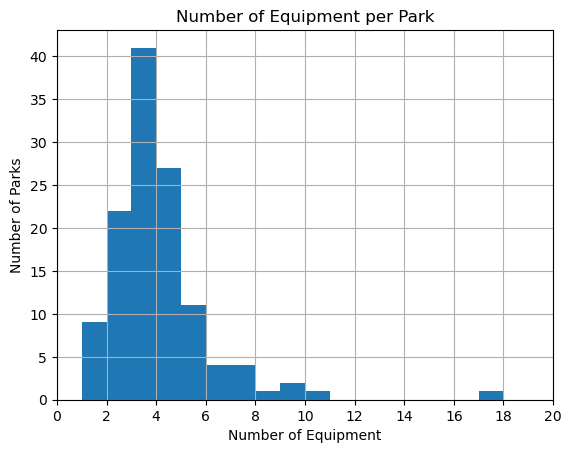

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
# Load the data
data = pd.read_csv('Playground_Equipment.csv')
data.rename(columns={'name':'Name', 'neighborhood':'Neighborhood', 'latitude':'Latitude', 'longitude':'Longitude'}, inplace=True)
playground_data = data[['Name', 'Neighborhood','Latitude','Longitude']]

# Group the data by name and neighborhood and calculate number of equipment at each park
parks_grouped_by_equipment = playground_data.groupby(['Name', 'Neighborhood']).size().reset_index(name='Number of Equipment')

# Plot the histogram of number of equipment per park
axarr = parks_grouped_by_equipment.hist(bins=17)
for ax in axarr.flatten():
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
    ax.set_xlabel("Number of Equipment")
    ax.set_ylabel("Number of Parks")
    ax.set_title("Number of Equipment per Park")

This graph shows that most playgrounds in Pittsburgh have 1-5 Pieces of Equipment, with a skew left and a major outlier with 17 pieces of equipment. Because of the variation in amount of equipment, it is plausible that certain neighborhoods may have a higher playground per park ratio, meaining that the number of parks would not necessarily be the most valid metric for determining the park-related ammenities a neighborhood provides. So, we will check the distribution of equipment/park for each neighborhood to see if the equipment/park distribution is skewed or not.

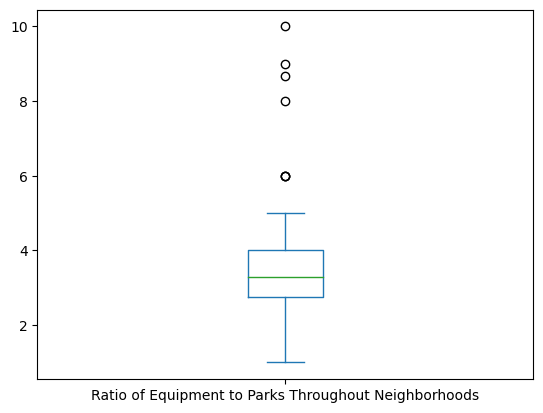

In [4]:
# Group the data by neighborhood and calculate number of equipment at each neighborhood
nbgh_grouped_by_equipment = playground_data.groupby(['Neighborhood']).size().reset_index(name='Number of Equipment')

# Group the data by neighborhood and calculate number of parks at each neighborhood
nbgh_grouped_by_parks = parks_grouped_by_equipment.groupby(['Neighborhood']).size().reset_index(name='Number of Parks')

# Merge the two dataframes
nbgh_ratio = pd.merge(nbgh_grouped_by_equipment, nbgh_grouped_by_parks, on='Neighborhood')
nbgh_ratio['Ratio'] = nbgh_ratio['Number of Equipment']/nbgh_ratio['Number of Parks']
ratio_box = nbgh_ratio['Ratio'].plot.box(label='Ratio of Equipment to Parks Throughout Neighborhoods')

Looking at this box-and-whisker plot, there is definitely some major variation between neighborhoods on the average number of pieces of equipment per park, so in order to make the best metric regarding the playgound quality provided by each neighborhood, we can't rely on the raw number of playgrounds, and instead must look at both the number of playgrounds in each neighborhood and the number of pieces of equipment per park in each neighborhood. 

Intuitively, this makes sense because obviously a neighborhood with one park with one piece of equipment would be worse than a neighborhood with one park with 20 pieces of equipment. On the other hand, a neighborhood with 4 parks with 5 pieces each would probably be better than a neighborhood with one park with 20 pieces of equipment.

We will describe the number of pieces of equipment in each park as its quality, because its a good metric on the amount of children it can accomodate as well as the size of the park.

<AxesSubplot:>

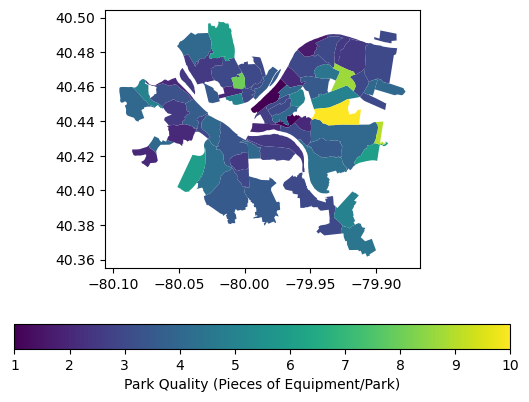

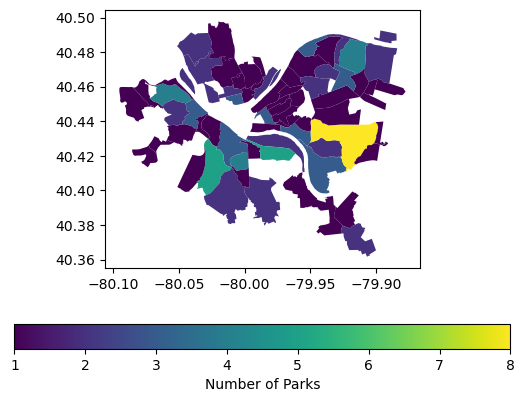

In [5]:
neighborhoods = geopandas.read_file("../Neighborhoods_Geopandas_Dir/Neighborhoods_.shp") # read in the shapefile

# Merge the geodataframe with the neighborhood ratio dataframe (the one with equipment count, park count, and ratio)
map_combined = neighborhoods.merge(nbgh_ratio, how='left', left_on='hood', right_on='Neighborhood')
map_combined.plot(column='Ratio', legend=True, legend_kwds={"label": "Park Quality (Pieces of Equipment/Park)", "orientation": "horizontal"})
map_combined.plot(column='Number of Parks', legend=True, legend_kwds={"label": "Number of Parks", "orientation": "horizontal"})

The maps above show two different stories: the number of parks and the quality of each park. Because there is no winner in both catergories, it is important to first look at making a comprehensive metric that combines both data points. For this, we will do a simple sum of quality (pieces of equipment/park) + quantity = playground metric.

<AxesSubplot:>

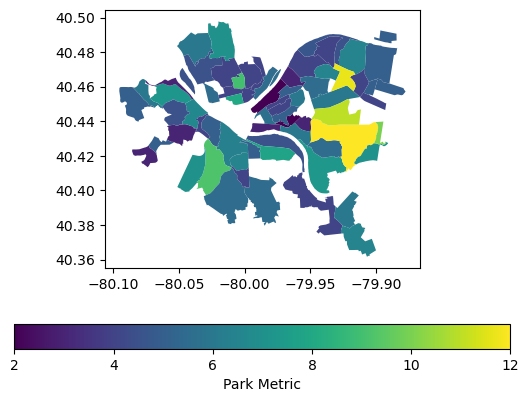

In [6]:
# Calculate park metric = ratio + number of parks
nbgh_ratio['Metric'] = nbgh_ratio['Ratio'] + nbgh_ratio['Number of Parks']

# Plot Metric on map
map_combined = neighborhoods.merge(nbgh_ratio, how='left', left_on='hood', right_on='Neighborhood')
map_combined.plot(column='Metric', legend=True, legend_kwds={"label": "Park Metric", "orientation": "horizontal"})

In [10]:
# Print list of neighborhoods sorted by metric
nbgh_final = nbgh_ratio.sort_values(by=['Metric'], ascending=False)
nbgh_final.to_csv('../export_parks.csv')


Looking at our metric on the map and chart, we can see that Squirrel Hill South has the best park options for children by quality and quantity, while West Oakland and the Strip District have the worst. Squirrel Hill South has 32 pieces of equipment, 8 parks, and a playground metric score of 12.

    Here is a photo of Squirrel Hill South
<p align= "center" >
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/SquirrelHillPA.jpg" width="1000" height="600">
</p>
    Photo by: https://en.wikipedia.org/wiki/File:SquirrelHillPA.jpg
